# Kings County Housing Prices Bakeoff

Below are a list of steps that you should take while trying to complete your bake-off entry.

## Step 1: Read in Data

In [1]:
import pandas as pd
pd.set_option('display.max_columns', 100)

import seaborn as sns
import matplotlib.pyplot as plt

import numpy as np
from statsmodels.formula.api import ols

from sklearn import linear_model
from sklearn import metrics
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest, f_regression,mutual_info_regression

In [2]:
df_test = pd.read_csv('Resources/kc_house_data_test_features.csv')
df = pd.read_csv('Resources/kc_house_data_train.csv')

## Step 2: Exploratory Data Analysis 
    
Let's become familiar with the data and create data visualizations to determine if there are any relationships between features and target variables.  

In [3]:
df.head()

,Unnamed: 0,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,0,2591820310,20141006T000000,365000.0,4,2.25,2070,8893,2.0,0,0,4,8,2070,0,1986,0,98058,47.4388,-122.162,2390,7700
1,1,7974200820,20140821T000000,865000.0,5,3.00,2900,6730,1.0,0,0,5,8,1830,1070,1977,0,98115,47.6784,-122.285,2370,6283
2,2,7701450110,20140815T000000,1038000.0,4,2.50,3770,10893,2.0,0,2,3,11,3770,0,1997,0,98006,47.5646,-122.129,3710,9685
3,3,9522300010,20150331T000000,1490000.0,3,3.50,4560,14608,2.0,0,2,3,12,4560,0,1990,0,98034,47.6995,-122.228,4050,14226
4,4,9510861140,20140714T000000,711000.0,3,2.50,2550,5376,2.0,0,0,3,9,2550,0,2004,0,98052,47.6647,-122.083,2250,4050


**insert key here**

In [4]:
#df.info() # all int, float, date - object
#df.shape # (17290, 22)
df.describe()

,Unnamed: 0,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,17290.000000,1.729000e+04,1.729000e+04,17290.000000,17290.000000,17290.000000,1.729000e+04,17290.000000,17290.000000,17290.000000,17290.000000,17290.000000,17290.000000,17290.000000,17290.000000,17290.000000,17290.000000,17290.000000,17290.000000,17290.000000,17290.000000
mean,8644.500000,4.565502e+09,5.407395e+05,3.372470,2.111943,2081.464604,1.524340e+04,1.490312,0.007981,0.238519,3.408502,7.654425,1789.306015,292.158589,1970.792019,83.806304,98078.193175,47.560058,-122.214258,1987.986698,12873.475824
std,4991.337413,2.874656e+09,3.733190e+05,0.939346,0.770476,920.018539,4.230462e+04,0.538909,0.088985,0.775229,0.651296,1.174718,829.265107,443.151874,29.343516,400.329376,53.607949,0.138412,0.140857,684.802635,27227.437583
min,0.000000,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.720000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,659.000000
25%,4322.250000,2.114701e+09,3.210000e+05,3.000000,1.500000,1430.000000,5.081250e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1200.000000,0.000000,1951.000000,0.000000,98033.000000,47.471200,-122.329000,1490.000000,5111.250000
50%,8644.500000,3.903650e+09,4.500000e+05,3.000000,2.250000,1920.000000,7.642000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1974.000000,0.000000,98065.000000,47.571600,-122.230000,1840.000000,7622.500000
75%,12966.750000,7.301150e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.072575e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2214.500000,560.000000,1996.000000,0.000000,98118.000000,47.677900,-122.126000,2360.000000,10101.750000
max,17289.000000,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,858132.000000


**First, we will will clean up our dataframe. Let's create a few new columns of interest, drop a few columns which will not be utilized for this model, and take care of some outliers.**

In [5]:
##Only run this cell once!

#Create new column 'age' for age of house
df['age'] = 2020 - df.yr_built

#Create new column 'last_renovted' for how long ago since last renovation
df['last_ren'] = np.where(df['yr_renovated'] > 0, (2020 - df['yr_renovated']), 0)

#Create new column 'last_ren2' for how long (years) since last renovation
df['last_ren2'] = np.where(df['yr_renovated'] > 0, (2020 - df['yr_renovated']), (2020 - df['yr_built']))

#Create 0/1 new column 'renovated'
df['renovated'] = np.where(df['yr_renovated']>0 , 1, 0)

#Create dummy columns using 'renovated'
df = pd.get_dummies(df, columns=['renovated'])

#Create dummy variable 'basement' y/n - 6806 with basement, 10484 without
df['basement'] = np.where(df['sqft_basement']>0 , 1, 0)

#Create a new column 'neighbors_compared' with sqft_living - sqft_living15
df['neighbors_compared'] = df.sqft_living - df.sqft_living15


#Fixing outliers
bathroom_median = df.bathrooms.median()
df.loc[df.bathrooms == 0, 'bathrooms'] = np.nan
df.fillna(bathroom_median,inplace=True)

#drop 33 bedrooms outlier
df = df[df.bedrooms != 33]

In [6]:
df = df.drop(['date','long', 'zipcode'], axis=1)

Now let's take a look!

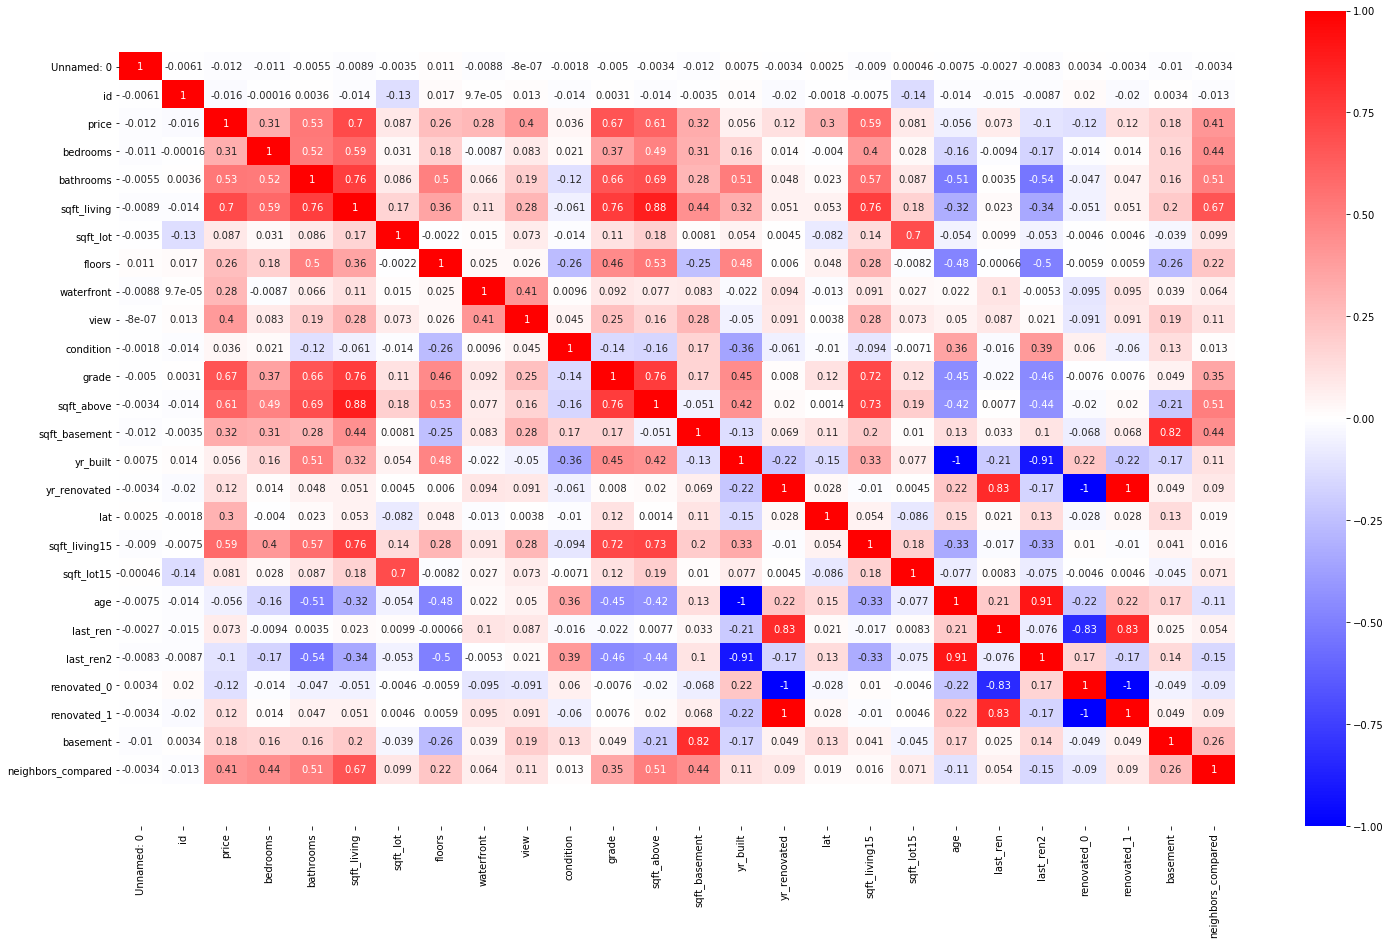

In [7]:
#create a heatmap to visualize the correlations
fig, ax = plt.subplots(figsize=(25,15)) # figsize to make larger
sns.heatmap(df.corr(), cmap='bwr', center=0, annot=True)

# fix for mpl bug that cuts off top/bottom of seaborn viz
b, t = plt.ylim() 
b += 2 
t -= 2 
plt.ylim(b, t) 
plt.show() 

### Statistical Test - T-Test on 'condition'

Text(0.5, 0, 'Condition')

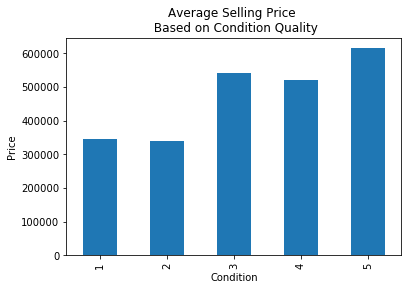

In [8]:
#Barplot Price v Condition
df.groupby('condition')['price'].mean().plot(kind='bar')
#Set labels
plt.title('Average Selling Price \n Based on Condition Quality', size=12)
plt.ylabel('Price')
plt.xlabel('Condition')

In [9]:
#Create 0/1 new column 'condition2'
df['condition2'] = np.where(df['condition']<=2, 0, 1)

In [10]:
# ## RUN ONCE
#Create dummy columns using 'condition2'
df = pd.get_dummies(df, columns=['condition2'])

In [11]:
# Sample Mean
df.groupby('condition2_0')['price'].mean()

condition2_0
0    542638.882810
1    340572.325153
Name: price, dtype: float64

In [12]:
# Sample Standard Deviation
df.groupby('condition2_0')['price'].std()

condition2_0
0    373675.421763
1    268672.291168
Name: price, dtype: float64

In [13]:
## t-test on 'condition'

mu = df.price.mean() 
c_x_bar = 542644.567467
c_sigma = 373665.252599
c_n = 17127
c_df = c_n-1

# Difference in sample mean 
diff = c_x_bar - mu


# Print the findings
print ('The difference between sample and population means is:', diff)

The difference between sample and population means is: 1910.7600750166457


In [14]:
# We can test 'condition' feature in model (according to t-score)
t = (c_x_bar -  mu)/(c_sigma/np.sqrt(c_n))
t

0.6692125744031859

### Statistical Test - T-Test on 'renovated'

In [15]:
# Sample Mean
df.groupby('renovated_1')['price'].mean()

renovated_1
0    531557.001751
1    750093.906336
Name: price, dtype: float64

In [16]:
# Sample Standard Deviation
df.groupby('renovated_1')['price'].std()

renovated_1
0    355736.498610
1    621893.769068
Name: price, dtype: float64

In [17]:
# Population Mean
df.price.mean()

540733.8073919833

In [18]:
## t-test on 'renovated_1'

mu = df.price.mean() 
r_x_bar = 750093.906336
r_sigma = 621893.769068
r_n = 726
r_df = r_n-1

# Difference in sample mean 
diff = r_x_bar - mu


# Print the findings
print ('The difference between sample and population means is:', diff)

The difference between sample and population means is: 209360.09894401662


In [19]:
#ttest score
t = (r_x_bar -  mu)/(r_sigma/np.sqrt(r_n))
t

9.070808946164282

*based on t-score, we cannot use 'renovated_0' column - best to drop from model

### Statistical Test - T-Test on 'waterfront'

In [20]:
# ## RUN ONCE
#Create dummy columns using 'waterfront'
df = pd.get_dummies(df, columns=['waterfront'])

In [21]:
pd.options.display.float_format = '{:.5f}'.format
# Sample Mean
df.groupby('waterfront_0')['price'].mean()

waterfront_0
0   1688486.17391
1    531498.78748
Name: price, dtype: float64

In [22]:
# Sample Standard Deviation
df.groupby('waterfront_0')['price'].std()

waterfront_0
0   1141363.28891
1    345549.03474
Name: price, dtype: float64

In [23]:
## t-test on 'waterfront_0'

mu = df.price.mean() 
w_x_bar = 1688486.17391
w_sigma = 1141363.28891
w_n = 138
w_df = w_n-1

# Difference in sample mean 
diff = w_x_bar - mu


# Print the findings
print ('The difference between sample and population means is:', diff)

The difference between sample and population means is: 1147752.3665180164


In [24]:
# We cannot test 'waterfront_0' feature in model
t = (w_x_bar -  mu)/(w_sigma/np.sqrt(w_n))
t

11.81309891351912

*based on t-score, we cannot use 'waterfront_0' column - best to drop from model

# Investigating strong correlations

In [25]:
lr_model = ols(formula='price~bathrooms + sqft_living + grade + sqft_living15', data=df).fit()
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.538
Model:                            OLS   Adj. R-squared:                  0.538
Method:                 Least Squares   F-statistic:                     5034.
Date:                Fri, 23 Oct 2020   Prob (F-statistic):               0.00
Time:                        16:09:19   Log-Likelihood:            -2.3968e+05
No. Observations:               17289   AIC:                         4.794e+05
Df Residuals:                   17284   BIC:                         4.794e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept     -6.029e+05   1.51e+04    -39.855      0.000   -6.33e+05   -5.73e+05
bathrooms     -3.937e+04   3931.192    -10.015      0.000   -4.71e+04   -3.17e+04
sqft_living     204.6888      4.218     48.531      0.000     196.422     212.956
grade          1.014e+05   2759.022     36.768      0.000     9.6e+04    1.07e+05
sqft_living15    12.2216      4.567      2.676      0.007       3.271      21.173
==============================================================================
Omnibus:                    14209.885   Durbin-Watson:                   2.013
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           975635.271
Skew:                           3.501   Prob(JB):                         0.00
Kurtosis:                      39.129   Cond. No.                     2.44e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.44e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

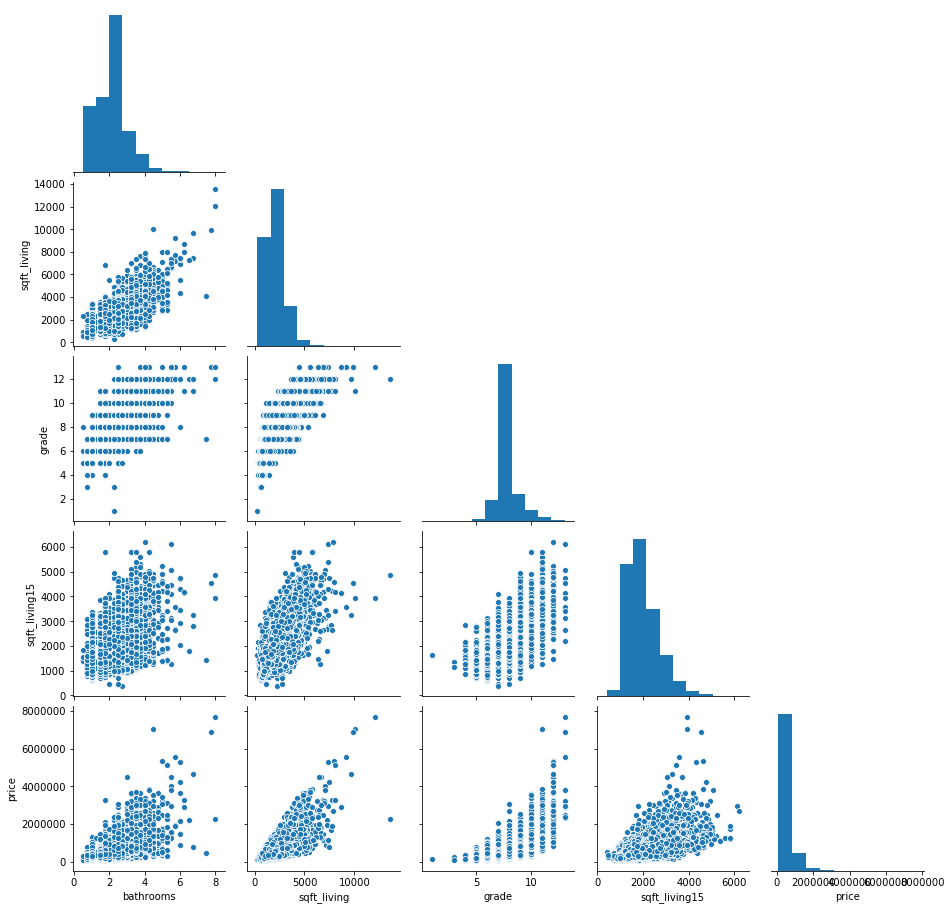

In [26]:
sns.pairplot(df[['bathrooms', 'sqft_living', 'grade', 'sqft_living15', 'price']], corner=True)


### Number of Bathrooms



Text(0.5, 0, 'Bathrooms')

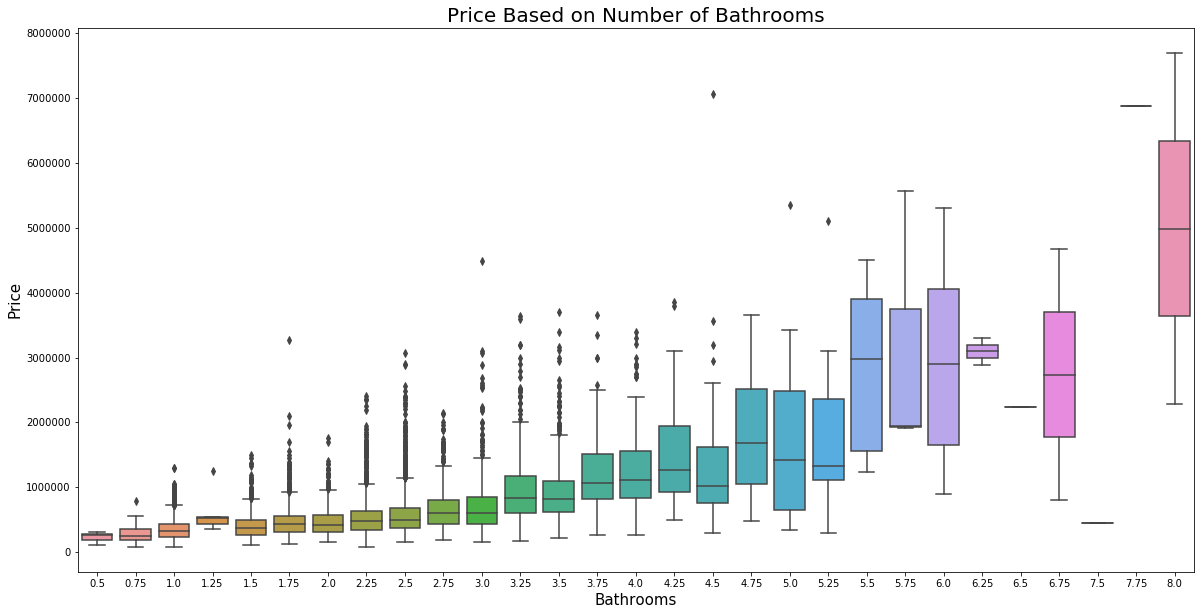

In [27]:
plt.figure(figsize=(20,10))
sns.boxplot( x=df["bathrooms"], y=df["price"] )

plt.title('Price Based on Number of Bathrooms', size=20)
plt.ylabel('Price', size=15)
plt.xlabel('Bathrooms', size=15)


### Compare to Neighbors Living Space Square Footage
T-test included

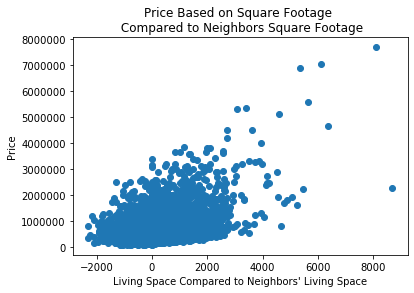

In [28]:
#Scatterplot - Square feet of a house compared to neighbor's house. Whose home is larger?
fig, ax = plt.subplots()

ax.set_title('Price Based on Square Footage \n Compared to Neighbors Square Footage')
ax.set_ylabel('Price')
ax.set_xlabel('Living Space Compared to Neighbors\' Living Space' )

y1 = df.price
x1 = df.neighbors_compared

plt.scatter(x1,y1);

In [29]:
##Run only once!!

#Whose home is larger?

#Create dummy variable 'neighbors_compared_dummy' y/n - 6806 with basement, 10484 without
df['neighbors_compared_dummy'] = np.where((df['sqft_living'] > df['sqft_living15']), 1, 0)

#Create dummy columns using 'neighbors_compared_dummy'
pd.get_dummies(df, columns=['neighbors_compared_dummy'])

,Unnamed: 0,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,lat,sqft_living15,sqft_lot15,age,last_ren,last_ren2,renovated_0,renovated_1,basement,neighbors_compared,condition2_0,condition2_1,waterfront_0,waterfront_1,neighbors_compared_dummy_0,neighbors_compared_dummy_1
0,0,2591820310,365000.00000,4,2.25000,2070,8893,2.00000,0,4,8,2070,0,1986,0,47.43880,2390,7700,34,0,34,1,0,0,-320,0,1,1,0,1,0
1,1,7974200820,865000.00000,5,3.00000,2900,6730,1.00000,0,5,8,1830,1070,1977,0,47.67840,2370,6283,43,0,43,1,0,1,530,0,1,1,0,0,1
2,2,7701450110,1038000.00000,4,2.50000,3770,10893,2.00000,2,3,11,3770,0,1997,0,47.56460,3710,9685,23,0,23,1,0,0,60,0,1,1,0,0,1
3,3,9522300010,1490000.00000,3,3.50000,4560,14608,2.00000,2,3,12,4560,0,1990,0,47.69950,4050,14226,30,0,30,1,0,0,510,0,1,1,0,0,1
4,4,9510861140,711000.00000,3,2.50000,2550,5376,2.00000,0,3,9,2550,0,2004,0,47.66470,2250,4050,16,0,16,1,0,0,300,0,1,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17285,17285,627300195,750000.00000,5,2.50000,3240,9960,1.00000,1,3,8,2020,1220,1958,0,47.58580,2730,10400,62,0,62,1,0,1,510,0,1,1,0,0,1
17286,17286,8819900270,440000.00000,2,1.75000,1300,4000,2.00000,0,3,7,1300,0,1948,0,47.66870,1350,4013,72,0,72,1,0,0,-50,0,1,1,0,1,0
17287,17287,3816300095,310000.00000,3,1.00000,1050,9876,1.00000,0,3,7,1050,0,1953,0,47.76350,1760,9403,67,0,67,1,0,0,-710,0,1,1,0,1,0
17288,17288,122069107,427500.00000,3,1.50000,1900,43186,1.50000,0,4,7,1300,600,1971,0,47.41990,2080,108028,49,0,49,1,0,1,-180,0,1,1,0,1,0


In [30]:
df.head()

,Unnamed: 0,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,lat,sqft_living15,sqft_lot15,age,last_ren,last_ren2,renovated_0,renovated_1,basement,neighbors_compared,condition2_0,condition2_1,waterfront_0,waterfront_1,neighbors_compared_dummy
0,0,2591820310,365000.00000,4,2.25000,2070,8893,2.00000,0,4,8,2070,0,1986,0,47.43880,2390,7700,34,0,34,1,0,0,-320,0,1,1,0,0
1,1,7974200820,865000.00000,5,3.00000,2900,6730,1.00000,0,5,8,1830,1070,1977,0,47.67840,2370,6283,43,0,43,1,0,1,530,0,1,1,0,1
2,2,7701450110,1038000.00000,4,2.50000,3770,10893,2.00000,2,3,11,3770,0,1997,0,47.56460,3710,9685,23,0,23,1,0,0,60,0,1,1,0,1
3,3,9522300010,1490000.00000,3,3.50000,4560,14608,2.00000,2,3,12,4560,0,1990,0,47.69950,4050,14226,30,0,30,1,0,0,510,0,1,1,0,1
4,4,9510861140,711000.00000,3,2.50000,2550,5376,2.00000,0,3,9,2550,0,2004,0,47.66470,2250,4050,16,0,16,1,0,0,300,0,1,1,0,1


In [31]:
# Sample Mean
df.groupby('neighbors_compared_dummy')['price'].mean()

neighbors_compared_dummy
0   464836.50683
1   632079.48789
Name: price, dtype: float64

In [32]:
# Sample Standard Deviation
df.groupby('neighbors_compared_dummy')['price'].std()

neighbors_compared_dummy
0   260064.32963
1   458757.90586
Name: price, dtype: float64

In [33]:
## t-test on comparing neighbor sqft_living_15

mu = df.price.mean() 
n_x_bar = 632080.49726
n_sigma = 458728.67850
n_n = 7847
n_df = w_n-1

# Difference in sample mean 
diff = n_x_bar - mu


# Print the findings
print ('The difference between sample and population means is:', diff)

The difference between sample and population means is: 91346.68986801663


In [34]:
# We cannot test on feature in model
t = (n_x_bar -  mu)/(n_sigma/np.sqrt(n_n))
t

17.639600653256686

### Grade



Text(0.5, 0, 'Building and Construction Rating')

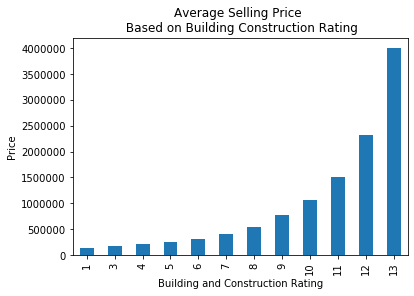

In [35]:
#Barplot Price v Grade
df.groupby('grade')['price'].mean().plot(kind='bar')

#Set labels
plt.title('Average Selling Price \n Based on Building Construction Rating', size=12)
plt.ylabel('Price')
plt.xlabel('Building and Construction Rating')

### Interior Square Footage

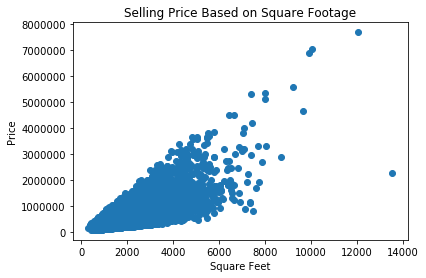

In [36]:
#Scatterplot - Square Feet of Living Space v Price
fig, ax = plt.subplots()

ax.set_title('Selling Price Based on Square Footage')
ax.set_ylabel('Price')
ax.set_xlabel('Square Feet')

y1 = df.price
x1 = df.sqft_living

plt.scatter(x1,y1);

## Investigating suprisingly weak correlations

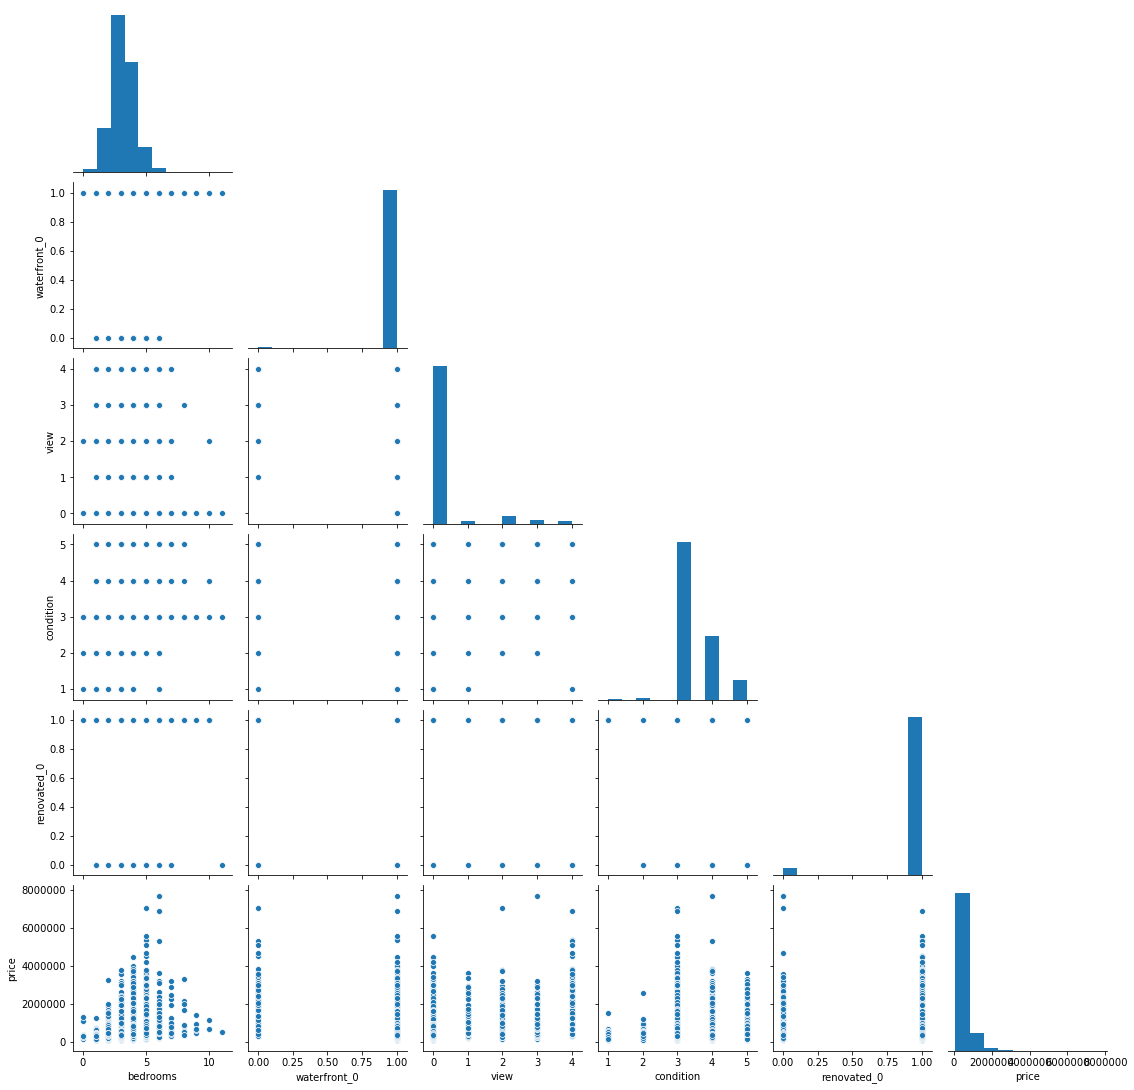

In [37]:
# I thought these would have a stronger correlation to price
sns.pairplot(df[['bedrooms', 'waterfront_0', 'view', 'condition', 'renovated_0', 'price']], corner=True)

### Bedrooms

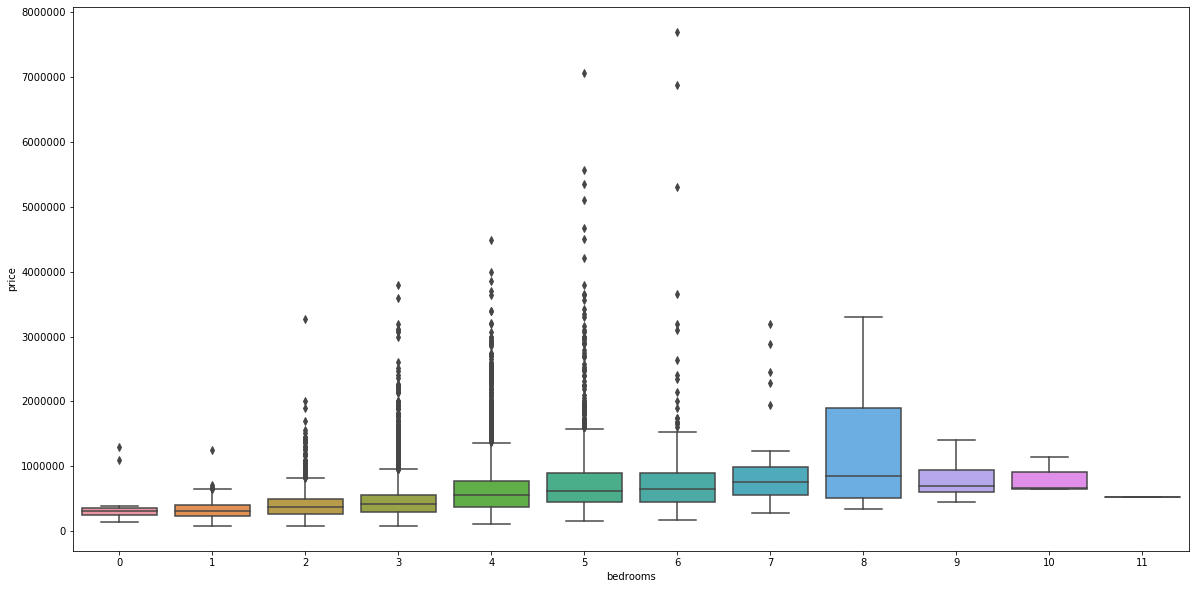

In [38]:
# Boxplot - Bedrooms v Price
plt.figure(figsize=(20,10))
sns.boxplot(x=df.bedrooms, y=df.price, data=pd.melt(df))
plt.show()

### Waterfront

Text(0.5, 0, 'Waterfront Property')

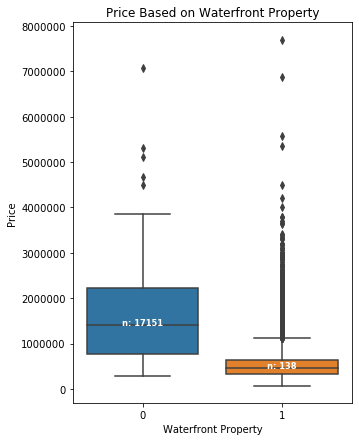

In [39]:
## Boxplot of Waterfront v. Price
plt.figure(figsize=(5,7))
ax = sns.boxplot(x=df['waterfront_0'], y=df['price'], data=df)
 
# Calculate number of obs per group & median to position labels
medians = df.groupby(['waterfront_0'])['price'].median().values
nobs = df['waterfront_0'].value_counts().values
nobs = [str(x) for x in nobs.tolist()]
nobs = ["n: " + i for i in nobs]
 
# Add it to the plot
pos = range(len(nobs))
for tick,label in zip(pos,ax.get_xticklabels()):
    ax.text(pos[tick], medians[tick] + 0.03, nobs[tick],
horizontalalignment='center', size='small', color='w', weight='semibold')
    
plt.title('Price Based on Waterfront Property')
plt.ylabel('Price')
plt.xlabel('Waterfront Property')

In [40]:
# Correlation
df[['waterfront_0','price']].corr()

,waterfront_0,price
waterfront_0,1.00000,-0.27578
price,-0.27578,1.00000


### View

Text(0.5, 0, 'View Rating')

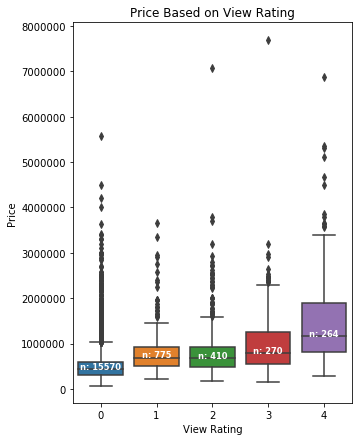

In [41]:
## Boxplot of View v. Price
plt.figure(figsize=(5,7))
ax = sns.boxplot(x=df['view'], y=df['price'], data=df)
 
# Calculate number of obs per group & median to position labels
medians = df.groupby(['view'])['price'].median().values
nobs = df['view'].value_counts().values
nobs = [str(x) for x in nobs.tolist()]
nobs = ["n: " + i for i in nobs]
 
# Add it to the plot
pos = range(len(nobs))
for tick,label in zip(pos,ax.get_xticklabels()):
    ax.text(pos[tick], medians[tick] + 0.03, nobs[tick],
horizontalalignment='center', size='small', color='w', weight='semibold')
    
plt.title('Price Based on View Rating')
plt.ylabel('Price')
plt.xlabel('View Rating')

Text(0.5, 0, 'Condition Quality')

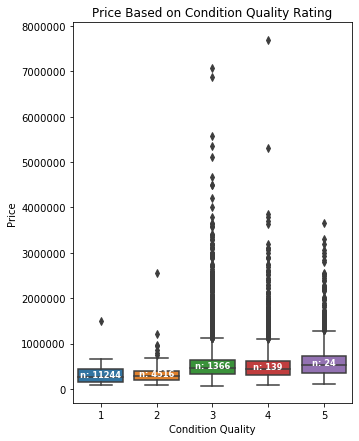

In [42]:
## Boxplot of Condition v. Price
plt.figure(figsize=(5,7))
ax = sns.boxplot(x=df['condition'], y=df['price'], data=df)
 
# Calculate number of obs per group & median to position labels
medians = df.groupby(['condition'])['price'].median().values
nobs = df['condition'].value_counts().values
nobs = [str(x) for x in nobs.tolist()]
nobs = ["n: " + i for i in nobs]
 
# Add it to the plot
pos = range(len(nobs))
for tick,label in zip(pos,ax.get_xticklabels()):
    ax.text(pos[tick], medians[tick] + 0.03, nobs[tick],
horizontalalignment='center', size='small', color='w', weight='semibold')
    
plt.title('Price Based on Condition Quality Rating')
plt.ylabel('Price')
plt.xlabel('Condition Quality')

### Renovation

Text(0.5, 0, 'Renovated')

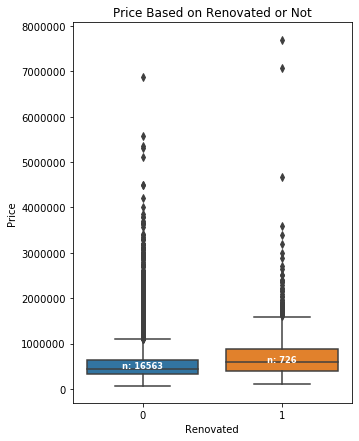

In [43]:
## Boxplot of Renovation v. Price
plt.figure(figsize=(5,7))
ax = sns.boxplot(x=df['renovated_1'], y=df['price'], data=df)
 
# Calculate number of obs per group & median to position labels
medians = df.groupby(['renovated_1'])['price'].median().values
nobs = df['renovated_1'].value_counts().values
nobs = [str(x) for x in nobs.tolist()]
nobs = ["n: " + i for i in nobs]
 
# Add it to the plot
pos = range(len(nobs))
for tick,label in zip(pos,ax.get_xticklabels()):
    ax.text(pos[tick], medians[tick] + 0.03, nobs[tick],
horizontalalignment='center', size='small', color='w', weight='semibold')
    
plt.title('Price Based on Renovated or Not')
plt.ylabel('Price')
plt.xlabel('Renovated')

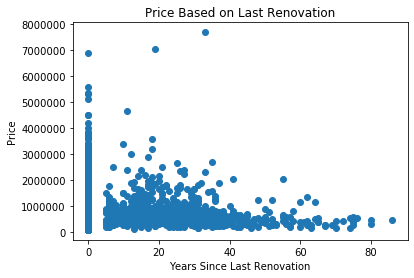

In [44]:
fig, ax = plt.subplots()

ax.set_title('Price Based on Last Renovation')
ax.set_ylabel('Price')
ax.set_xlabel('Years Since Last Renovation')

y1 = df.price
x1 = df.last_ren

plt.scatter(x1,y1);

In [45]:
df[['last_ren', 'price']].corr()

,last_ren,price
last_ren,1.00000,0.07270
price,0.07270,1.00000


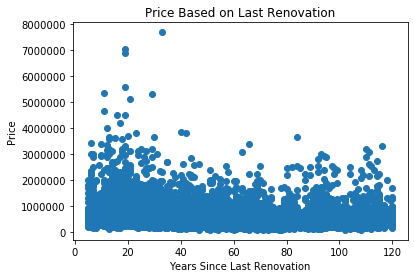

In [46]:
#This plot takes in year built as "last renovation"
fig, ax = plt.subplots()
plt.figsize=(40,40)

ax.set_title('Price Based on Last Renovation')
ax.set_ylabel('Price')
ax.set_xlabel('Years Since Last Renovation')

y1 = df.price
x1 = df.last_ren2

plt.scatter(x1,y1);

In [47]:
df[['last_ren2','price']].corr()

,last_ren2,price
last_ren2,1.00000,-0.10483
price,-0.10483,1.00000


### Checking up on our correlations heat map

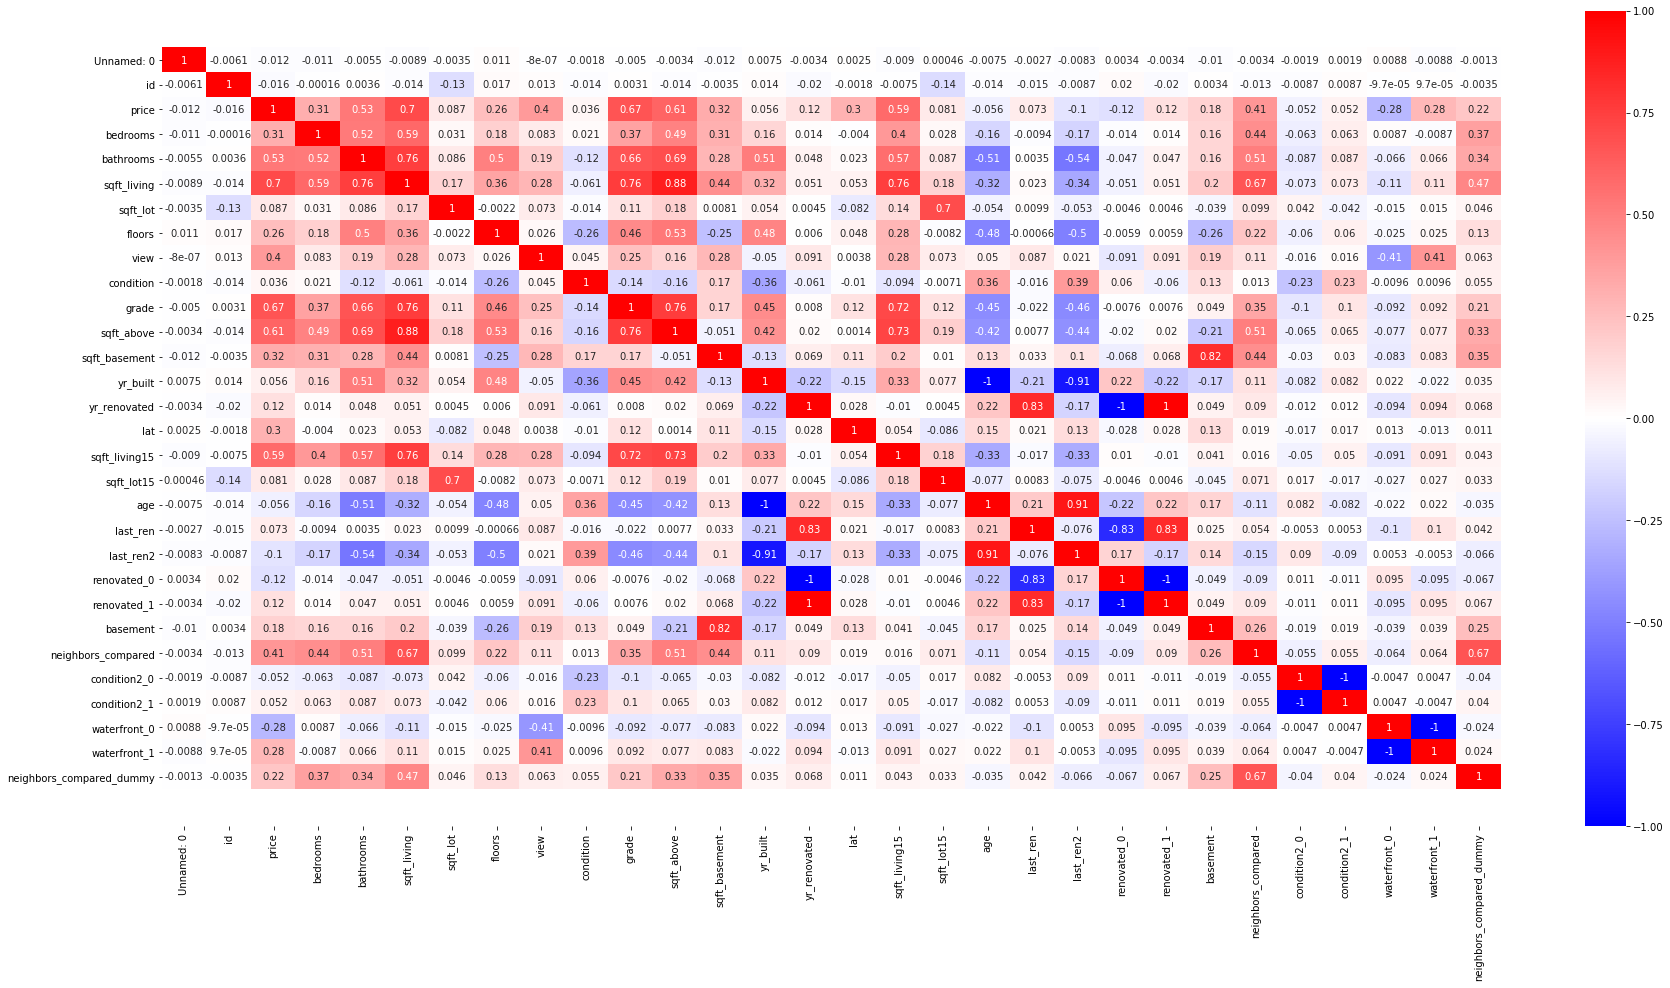

In [49]:
#Let's take a look to see any added features
fig, ax = plt.subplots(figsize=(30,15)) # figsize to make larger
sns.heatmap(df.corr(), cmap='bwr', center=0, annot=True)

# fix for mpl bug that cuts off top/bottom of seaborn viz
b, t = plt.ylim()
b += 2 
t -= 2 
plt.ylim(b, t)
plt.show() 

### Checking on p-values and R-squared

In [50]:
lr_model = ols(formula='price~bathrooms + sqft_living + view + grade + sqft_above +sqft_living15 + neighbors_compared_dummy + condition2_1 +bedrooms + waterfront_1', data=df).fit()

lr_model.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.602
Model:                            OLS   Adj. R-squared:                  0.602
Method:                 Least Squares   F-statistic:                     2613.
Date:                Fri, 23 Oct 2020   Prob (F-statistic):               0.00
Time:                        16:11:42   Log-Likelihood:            -2.3839e+05
No. Observations:               17289   AIC:                         4.768e+05
Df Residuals:                   17278   BIC:                         4.769e+05
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept                -4.392e+05   2.36e+04    -18.622      0.000   -4.85e+05   -3.93e+05
bathrooms                -2.321e+04   3715.780     -6.246      0.000   -3.05e+04   -1.59e+04
sqft_living                277.0180      5.977     46.350      0.000     265.303     288.733
view                      5.882e+04   2715.988     21.658      0.000    5.35e+04    6.41e+04
grade                     9.644e+04   2681.929     35.959      0.000    9.12e+04    1.02e+05
sqft_above                 -54.1260      4.878    -11.096      0.000     -63.688     -44.564
sqft_living15              -24.7970      4.935     -5.024      0.000     -34.471     -15.123
neighbors_compared_dummy  -6.56e+04   4903.031    -13.380      0.000   -7.52e+04    -5.6e+04
condition2_1              -2.77e+04   1.87e+04     -1.484      0.138   -6.43e+04    8888.541
bedrooms                 -3.002e+04   2531.286    -11.860      0.000    -3.5e+04   -2.51e+04
waterfront_1              5.919e+05   2.21e+04     26.761      0.000    5.49e+05    6.35e+05
==============================================================================
Omnibus:                    12358.523   Durbin-Watson:                   2.007
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           683982.763
Skew:                           2.859   Prob(JB):                         0.00
Kurtosis:                      33.278   Cond. No.                     5.69e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.69e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## Train-Test Split

If you plan on doing any scaling of your data, make sure it is done at the appropriate time. 

In [51]:
features = ['bathrooms', 'sqft_living', 'view', 'grade', 'sqft_above', 'sqft_living15', 'neighbors_compared', 'condition2_1', 'bedrooms', 'waterfront_1']
df_features = df[features]
target = df['price']


In [52]:
df_features.describe()

,bathrooms,sqft_living,view,grade,sqft_above,sqft_living15,neighbors_compared,condition2_1,bedrooms,waterfront_1
count,17289.00000,17289.00000,17289.00000,17289.00000,17289.00000,17289.00000,17289.00000,17289.00000,17289.00000,17289.00000
mean,2.11301,2081.49130,0.23853,7.65446,1789.34936,1988.02476,93.46654,0.99057,3.37076,0.00798
std,0.76916,920.03845,0.77525,1.17474,829.26951,684.80415,603.30552,0.09664,0.91194,0.08899
min,0.50000,290.00000,0.00000,1.00000,290.00000,399.00000,-2310.00000,0.00000,0.00000,0.00000
25%,1.50000,1430.00000,0.00000,7.00000,1200.00000,1490.00000,-220.00000,1.00000,3.00000,0.00000
50%,2.25000,1920.00000,0.00000,7.00000,1560.00000,1840.00000,0.00000,1.00000,3.00000,0.00000
75%,2.50000,2550.00000,0.00000,8.00000,2216.00000,2360.00000,310.00000,1.00000,4.00000,0.00000
max,8.00000,13540.00000,4.00000,13.00000,9410.00000,6210.00000,8690.00000,1.00000,11.00000,1.00000


In [53]:
#call train_test_split on the data and capture the results
X_train, X_test, y_train, y_test = train_test_split(df_features, target, random_state=34,test_size=0.2)

#check the shape of the results
print("Training set - Features: ", X_train.shape, "Target: ", y_train.shape)
print("Training set - Features: ", X_test.shape, "Target: ",y_test.shape)


Training set - Features:  (13831, 10) Target:  (13831,)
Training set - Features:  (3458, 10) Target:  (3458,)


### Fit scaler to training the data and transform testing set

In [54]:
#your code here 
scaler = StandardScaler()
# fit the scaler to the training data
scaler.fit(X_train)
#transform the training data
X_train = pd.DataFrame(data=scaler.transform(X_train), columns=df_features.columns)
#transform the testing dat
X_test = pd.DataFrame(data=scaler.transform(X_test), columns=df_features.columns)

In [55]:
#instantiate a linear regression object
lm = LinearRegression()

#fit the linear regression to the data
lm = lm.fit(X_train, y_train)
y_train_pred = lm.predict(X_train)
train_rmse = np.sqrt(metrics.mean_squared_error(y_train, y_train_pred))

print('Training Root Mean Squared Error:' , train_rmse)

Training Root Mean Squared Error: 235040.18973634674


In [56]:
#use fitted model to predict on the test examples
y_test_pred = lm.predict(X_test)

#evaluate the predictions on the test examples
test_rmse = np.sqrt(metrics.mean_squared_error(y_test, y_test_pred))

print('Testing Root Mean Squared Error:' , test_rmse)
print('Training: ', int(train_rmse), "vs. Testing: ", int(test_rmse))

Testing Root Mean Squared Error: 243568.13900305345
Training:  235040 vs. Testing:  243568


### Predict a set with log

In [57]:
#take the natural log of the target variable
y_log = np.log(y_train)

In [58]:
#instantiate a linear regression object
lm_log = LinearRegression()

#fit the linear regression to the data
lm_log = lm_log.fit(X_train, y_log)

log_train_pred = lm_log.predict(X_train)

In [59]:
#log_train_pred the predictions to get them on the same original scale 
y_train_pred = np.exp(log_train_pred)

In [60]:
train_rmse = np.sqrt(metrics.mean_squared_error(y_train, log_train_pred))

print('Training Root Mean Squared Error:' , train_rmse)

Training Root Mean Squared Error: 656091.7582545537


In [61]:
log_test_pred = lm_log.predict(X_test)
#exponentiate the predictions to get them on the same original scale 
log_test_pred = np.exp(log_test_pred)
log_test_rmse = np.sqrt(metrics.mean_squared_error(y_test, log_test_pred))

print('Testing Root Mean Squared Error:' , log_test_rmse)

Testing Root Mean Squared Error: 282991.4908631039


In [62]:
y_test_pred = lm_log.predict(X_test)


#our model predcicte the log of gross, so now we must exponentiate to get the value in $
y_test_pred = np.exp(y_test_pred)

test_rmse = np.sqrt(metrics.mean_squared_error(y_test, y_test_pred))

print('Testing Root Mean Squared Error:' , test_rmse)
print('Training: ', int(train_rmse), "vs. Testing: ", int(test_rmse))

Testing Root Mean Squared Error: 282991.4908631039
Training:  656091 vs. Testing:  282991


## Polynomial

In [63]:
poly= PolynomialFeatures(degree=2, include_bias=False)
poly_data = poly.fit_transform(df_features)
poly_columns = poly.get_feature_names(df_features.columns)
df_poly = pd.DataFrame(poly_data, columns=poly_columns)
df_poly.head()

,bathrooms,sqft_living,view,grade,sqft_above,sqft_living15,neighbors_compared,condition2_1,bedrooms,waterfront_1,bathrooms^2,bathrooms sqft_living,bathrooms view,bathrooms grade,bathrooms sqft_above,bathrooms sqft_living15,bathrooms neighbors_compared,bathrooms condition2_1,bathrooms bedrooms,bathrooms waterfront_1,sqft_living^2,sqft_living view,sqft_living grade,sqft_living sqft_above,sqft_living sqft_living15,sqft_living neighbors_compared,sqft_living condition2_1,sqft_living bedrooms,sqft_living waterfront_1,view^2,view grade,view sqft_above,view sqft_living15,view neighbors_compared,view condition2_1,view bedrooms,view waterfront_1,grade^2,grade sqft_above,grade sqft_living15,grade neighbors_compared,grade condition2_1,grade bedrooms,grade waterfront_1,sqft_above^2,sqft_above sqft_living15,sqft_above neighbors_compared,sqft_above condition2_1,sqft_above bedrooms,sqft_above waterfront_1,sqft_living15^2,sqft_living15 neighbors_compared,sqft_living15 condition2_1,sqft_living15 bedrooms,sqft_living15 waterfront_1,neighbors_compared^2,neighbors_compared condition2_1,neighbors_compared bedrooms,neighbors_compared waterfront_1,condition2_1^2,condition2_1 bedrooms,condition2_1 waterfront_1,bedrooms^2,bedrooms waterfront_1,waterfront_1^2
0,2.25000,2070.00000,0.00000,8.00000,2070.00000,2390.00000,-320.00000,1.00000,4.00000,0.00000,5.06250,4657.50000,0.00000,18.00000,4657.50000,5377.50000,-720.00000,2.25000,9.00000,0.00000,4284900.00000,0.00000,16560.00000,4284900.00000,4947300.00000,-662400.00000,2070.00000,8280.00000,0.00000,0.00000,0.00000,0.00000,0.00000,-0.00000,0.00000,0.00000,0.00000,64.00000,16560.00000,19120.00000,-2560.00000,8.00000,32.00000,0.00000,4284900.00000,4947300.00000,-662400.00000,2070.00000,8280.00000,0.00000,5712100.00000,-764800.00000,2390.00000,9560.00000,0.00000,102400.00000,-320.00000,-1280.00000,-0.00000,1.00000,4.00000,0.00000,16.00000,0.00000,0.00000
1,3.00000,2900.00000,0.00000,8.00000,1830.00000,2370.00000,530.00000,1.00000,5.00000,0.00000,9.00000,8700.00000,0.00000,24.00000,5490.00000,7110.00000,1590.00000,3.00000,15.00000,0.00000,8410000.00000,0.00000,23200.00000,5307000.00000,6873000.00000,1537000.00000,2900.00000,14500.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,64.00000,14640.00000,18960.00000,4240.00000,8.00000,40.00000,0.00000,3348900.00000,4337100.00000,969900.00000,1830.00000,9150.00000,0.00000,5616900.00000,1256100.00000,2370.00000,11850.00000,0.00000,280900.00000,530.00000,2650.00000,0.00000,1.00000,5.00000,0.00000,25.00000,0.00000,0.00000
2,2.50000,3770.00000,2.00000,11.00000,3770.00000,3710.00000,60.00000,1.00000,4.00000,0.00000,6.25000,9425.00000,5.00000,27.50000,9425.00000,9275.00000,150.00000,2.50000,10.00000,0.00000,14212900.00000,7540.00000,41470.00000,14212900.00000,13986700.00000,226200.00000,3770.00000,15080.00000,0.00000,4.00000,22.00000,7540.00000,7420.00000,120.00000,2.00000,8.00000,0.00000,121.00000,41470.00000,40810.00000,660.00000,11.00000,44.00000,0.00000,14212900.00000,13986700.00000,226200.00000,3770.00000,15080.00000,0.00000,13764100.00000,222600.00000,3710.00000,14840.00000,0.00000,3600.00000,60.00000,240.00000,0.00000,1.00000,4.00000,0.00000,16.00000,0.00000,0.00000
3,3.50000,4560.00000,2.00000,12.00000,4560.00000,4050.00000,510.00000,1.00000,3.00000,0.00000,12.25000,15960.00000,7.00000,42.00000,15960.00000,14175.00000,1785.00000,3.50000,10.50000,0.00000,20793600.00000,9120.00000,54720.00000,20793600.00000,18468000.00000,2325600.00000,4560.00000,13680.00000,0.00000,4.00000,24.00000,9120.00000,8100.00000,1020.00000,2.00000,6.00000,0.00000,144.00000,54720.00000,48600.00000,6120.00000,12.00000,36.00000,0.00000,20793600.00000,18468000.00000,2325600.00000,4560.00000,13680.00000,0.00000,16402500.00000,2065500.00000,4050.00000,12150.00000,0.00000,260100.00000,510.00000,1530.00000,0.00000,1.00000,3.00000,0.00000,9.00000,0.00000,0.00000
4,2.50000,2550.00000,0.00000,9.00000,2550.00000,2250.00000,300.00000,1.00000,3.00000,0.00000,6.25000,6375.00000

# DO I NEED THESE 2 LINES??

In [99]:
#X_train, X_test, y_train, y_test = train_test_split(df_poly, target, random_state=9,test_size=0.2)


In [100]:
#X_train.shape

(13831, 65)

In [64]:
# instantiate a linear regression object
lm_2 = LinearRegression()

#fit the linear regression to the data
lm_2 = lm_2.fit(X_train, y_train)

y_train_pred = lm_2.predict(X_train)

train_rmse = np.sqrt(metrics.mean_squared_error(y_train, y_train_pred))

print('Training Root Mean Squared Error:' , train_rmse)

# print(lm_2.intercept_)
# print(lm_2.coef_)

Training Root Mean Squared Error: 235040.18973634674


# Winning Model?

In [67]:
selector = SelectKBest(f_regression, k=20)
selector.fit(X_train, y_train)

ValueError: k should be >=0, <= n_features = 10; got 20. Use k='all' to return all features.

In [66]:
X_train.shape

(13831, 10)

In [104]:
selected_columns = X_train.columns[selector.get_support()]
removed_columns = X_train.columns[~selector.get_support()]
#X_train = X_train[selected_columns]
#X_test = X_test[selected_columns]

In [105]:
#Test these on holdout
list(selected_columns)

['sqft_living',
 'grade',
 'sqft_above',
 'bathrooms sqft_living',
 'bathrooms grade',
 'bathrooms sqft_above',
 'bathrooms sqft_living15',
 'sqft_living^2',
 'sqft_living grade',
 'sqft_living sqft_above',
 'sqft_living sqft_living15',
 'sqft_living condition2_1',
 'sqft_living bedrooms',
 'grade^2',
 'grade sqft_above',
 'grade sqft_living15',
 'sqft_above^2',
 'sqft_above sqft_living15',
 'sqft_above condition2_1',
 'sqft_living15^2']

### 5.5) Use the model to predict on the training set and the test set.

In [72]:
#instantiate a linear regression object
lm_kbest = LinearRegression()

#fit the linear regression to the data
lm_kbest = lm_kbest.fit(X_train[selected_columns], y_train)

y_train_kbest = lm_kbest.predict(X_train[selected_columns])


trainK_rmse = np.sqrt(metrics.mean_squared_error(y_train, y_train_kbest))
print('Training Root Mean Squared Error:' , trainK_rmse)

y_kbest = lm_kbest.predict(X_test[selected_columns])

testK_rmse = np.sqrt(metrics.mean_squared_error(y_test, y_kbest))
print('Testing Root Mean Squared Error:' , testK_rmse)


Training Root Mean Squared Error: 226833.77091048914
Testing Root Mean Squared Error: 238151.14062299754


In [73]:
print('Original: ', test_rmse, '\n',
      "KBest:   ", testK_rmse,'\n')

Original:  282991.4908631039 
 KBest:    238151.14062299754 



# Final Model

In [74]:
#instantiate a linear regression object
winner = LinearRegression()

#fit the linear regression to the data
winner = winner.fit(df_poly[selected_columns], target)


In [75]:
columns = list(df_poly[selected_columns].columns)
columns

['sqft_living',
 'grade',
 'sqft_above',
 'bathrooms sqft_living',
 'bathrooms grade',
 'bathrooms sqft_above',
 'bathrooms sqft_living15',
 'sqft_living^2',
 'sqft_living grade',
 'sqft_living sqft_above',
 'sqft_living sqft_living15',
 'sqft_living condition2_1',
 'sqft_living bedrooms',
 'grade^2',
 'grade sqft_above',
 'grade sqft_living15',
 'sqft_above^2',
 'sqft_above sqft_living15',
 'sqft_above condition2_1',
 'sqft_living15^2']

In [76]:
winner.coef_

array([-4.12055769e+02, -8.63482357e+04,  2.51320457e+02,  1.39463818e+01,
       -1.72302977e+03,  1.00606810e+01, -1.97826031e+01, -9.78094174e-02,
        6.78651954e+01,  2.27463056e-01,  1.76962251e-02,  6.57270126e+01,
       -4.67319505e+00,  6.63872633e+03, -3.47090578e+01,  6.40769398e+00,
       -1.03308099e-01, -8.77834212e-02, -7.00662138e+01,  3.90764101e-02])

## Final model saved using pickle.
Holdout prediction may be found in the main folder of this repo.

In [77]:
import pickle

## Pickle Model
pickle_out = open("model.pickle","wb")
pickle.dump(winner, pickle_out)
pickle_out.close()

## Pickle Scaler
pickle_out = open("scaler.pickle","wb")
pickle.dump(scaler, pickle_out)
pickle_out.close()

In [80]:
df.head()

,Unnamed: 0,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,sqft_living15,sqft_lot15,age,last_ren,last_ren2,renovated_0,renovated_1,basement,neighbors_compared,condition2_0,condition2_1,waterfront_0,waterfront_1,neighbors_compared_dummy
0,0,2591820310,365000.00000,4,2.25000,2070,8893,2.00000,0,4,8,2070,0,1986,0,2390,7700,34,0,34,1,0,0,-320,0,1,1,0,0
1,1,7974200820,865000.00000,5,3.00000,2900,6730,1.00000,0,5,8,1830,1070,1977,0,2370,6283,43,0,43,1,0,1,530,0,1,1,0,1
2,2,7701450110,1038000.00000,4,2.50000,3770,10893,2.00000,2,3,11,3770,0,1997,0,3710,9685,23,0,23,1,0,0,60,0,1,1,0,1
3,3,9522300010,1490000.00000,3,3.50000,4560,14608,2.00000,2,3,12,4560,0,1990,0,4050,14226,30,0,30,1,0,0,510,0,1,1,0,1
4,4,9510861140,711000.00000,3,2.50000,2550,5376,2.00000,0,3,9,2550,0,2004,0,2250,4050,16,0,16,1,0,0,300,0,1,1,0,1
